## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1.	Data manipulation
2.	Exploratory Data Analysis

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.
Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# Part1: Cleaning, wrangling data

**Data cleaning focuses on removing inaccurate data from your data set whereas data wrangling focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use.
This excersize uses the traffic_cameras file. Your task is to follow prompts to change, modify your data. Try your best!**

In [99]:
#read in libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd


In [100]:
# Reading the CSV file
df_traffic = pd.read_csv("traffic_cameras.csv")

# Printing top 5 rows
df_traffic.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. How many rows and columns does your data have?

In [102]:
### Your code goes here ###
df_traffic.shape

(802, 28)

### 2. What can you tell us about the type of variables we have?

In [103]:
### Your code goes here ###
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary St Segment ID         0 non-null      float64
 12  Cross St Segment ID           0 non-null      float64
 13  Prima

In [104]:
df_traffic.head()

,Camera ID,Location Name,Camera Status,Turn on Date,Camera Manufacturer,ATD Location ID,Landmark,Signal Engineer Area,Council District,Jurisdiction,...,CROSS_ST_AKA,COA Intersection ID,Modified Date,IP Comm Status,IP Comm Status Date and Time,Published Screenshots,Screenshot Address,Funding,ID,Location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,5/24/2018,Advidia,LOC16-003180,NaN,SOUTHEAST,2,AUSTIN FULL PURPOSE,...,NaN,5157009.0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,NaN,https://cctv.austinmobility.io/image/370.jpg,1/4 Cent,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,5/21/2018,Advidia,LOC16-000640,NaN,SOUTHWEST,5,AUSTIN FULL PURPOSE,...,NaN,5154418.0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/379.jpg,1/4 Cent,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,6/7/2018,Advidia,LOC16-000800,NaN,NORTHEAST,"3, 1",AUSTIN FULL PURPOSE,...,NaN,5163165.0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/404.jpg,1/4 Cent,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,9/9/2016,Advidia,LOC16-003740,NaN,NORTHWEST,7,AUSTIN FULL PURPOSE,...,NaN,5156985.0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/447.jpg,1/4 Cent,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,2/24/2020,Advidia,LOC16-003710,NaN,CENTRAL,10,AUSTIN FULL PURPOSE,...,NaN,5153874.0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,NaN,https://cctv.austinmobility.io/image/552.jpg,None Identified,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### Your asnwer should go in here ### change the cell to markdown

We have both Quantitative and qualitative analysis in the above data So i have categorised between them below:
 categorical, Qualitative variables - Location Name
,Turn on Date,Camera Status,Camera Manufacturer,Camera Manufacturer,Landmark,
Signal Engineer Area,Jurisdiction,Location Type,Primary Street,Cross Street,IP Comm Status,Funding,

Continous , Quantitative variables- Camera ID
,ATD Location ID,Council District,Primary Street Block,Cross Street Block,COA Intersection ID,Modified Date,IP Comm Status Date and Time,Screenshot Address,ID,Location.

Null data:Primary St Segment ID,Cross St Segment ID,PRIMARY_ST_AKA,CROSS_ST_AKA,Published Screenshots,




### 3. Delete only the columns that have all null values, name it df1 (nothing else, but null)

In [106]:
### Your code goes here ###
df1=df_traffic.dropna(axis=1,how='all')



In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Camera ID                     802 non-null    int64  
 1   Location Name                 802 non-null    object 
 2   Camera Status                 802 non-null    object 
 3   Turn on Date                  442 non-null    object 
 4   Camera Manufacturer           646 non-null    object 
 5   ATD Location ID               802 non-null    object 
 6   Landmark                      94 non-null     object 
 7   Signal Engineer Area          799 non-null    object 
 8   Council District              790 non-null    object 
 9   Jurisdiction                  799 non-null    object 
 10  Location Type                 802 non-null    object 
 11  Primary Street Block          800 non-null    float64
 12  Primary Street                801 non-null    object 
 13  Cross

### 4. Dropp columns that have (any) null values name it df2

In [108]:
### Your code goes here ###
df2=df1.dropna(axis=1)

In [109]:
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Camera ID                     802 non-null    int64 
 1   Location Name                 802 non-null    object
 2   Camera Status                 802 non-null    object
 3   ATD Location ID               802 non-null    object
 4   Location Type                 802 non-null    object
 5   Modified Date                 802 non-null    object
 6   IP Comm Status                802 non-null    object
 7   IP Comm Status Date and Time  802 non-null    object
 8   Screenshot Address            802 non-null    object
 9   ID                            802 non-null    object
 10  Location                      802 non-null    object
dtypes: int64(1), object(10)
memory usage: 69.0+ KB


(802, 11)

### 5. Rename column names in df2 so they are more usable (name the new dataframe df3) to the followings: cam_id, loc_name, cam_stat, atd_loc_id, loc_type, date, comm_stat, comm_stat_date, screen_addr, id, location

In [110]:
### Your code goes here ###
df3=df2.rename(columns={'Camera ID':'cam_id','Location Name':'loc_name','Camera Status':'cam_stat','ATD Location ID':'atd_loc_id','Location Type':'loc_type','Modified Date':'date','IP Comm Status':'comm_stat','IP Comm Status Date and Time':'comm_stat_date','Screenshot Address':'screen_addr','ID':'id','Location':'location'})

In [111]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883)
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982)
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615)
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582)
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338)


### 6. Split "date" column into two  new columns within df3 ('Dates' and 'Time') /modify df3 data/

In [113]:
### Your code goes here ###
df3['Dates']=pd.to_datetime(df3['date']).dt.date
df3['Time']=pd.to_datetime(df3['date']).dt.time

In [ ]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00


### 7. Split atd_loc into two new columns 'Loc' and 'code' within df3

In [114]:
### Your code goes here ###
df3[['Loc','code']]=df3['atd_loc_id'].str.split('-',expand=True)

In [115]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,ROADWAY,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,ROADWAY,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,ROADWAY,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,ROADWAY,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,ROADWAY,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710


### 8. What are the unique values in loc_type?

In [116]:
### Your code goes here ###
df3.loc_type.unique()

array(['ROADWAY', 'BUILDING'], dtype=object)

### 9. Replace 'ROADWAY' to '0',  'BUILDING' to '1' in the loc_type column within df3

In [117]:
### Your code goes here ###
df3['loc_type']=df3['loc_type'].replace({'ROADWAY':'0','BUILDING':'1'})

In [118]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710


In [119]:
df3.loc_type.unique()

array(['0', '1'], dtype=object)

### 10. Split on on '/' the loc_name column into two new variables 'corner1', 'corner2'

In [120]:
### Your code goes here ###
df3[['corner1','corner2']]=df3['loc_name'].str.split('/',1,expand=True)

<ipython-input-120-8615f6cec66e>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3[['corner1','corner2']]=df3['loc_name'].str.split('/',1,expand=True)


In [121]:
df3.head()

,cam_id,loc_name,cam_stat,atd_loc_id,loc_type,date,comm_stat,comm_stat_date,screen_addr,id,location,Dates,Time,Loc,code,corner1,corner2
0,370,PLEASANT VALLEY RD / NUCKOLS CROSSING RD,TURNED_ON,LOC16-003180,0,10/28/2021 08:40:00 AM +0000,ONLINE,10/28/2021 08:30:00 AM +0000,https://cctv.austinmobility.io/image/370.jpg,591a10a020eacf2d16669b94,POINT (-97.7449036 30.1844883),2021-10-28,08:40:00,LOC16,003180,PLEASANT VALLEY RD,NUCKOLS CROSSING RD
1,379,BARTON SPRINGS RD / KINNEY AVE,TURNED_ON,LOC16-000640,0,10/29/2021 08:45:00 AM +0000,ONLINE,10/29/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/379.jpg,591a10a020eacf2d16669ba6,POINT (-97.761467 30.261982),2021-10-29,08:45:00,LOC16,000640,BARTON SPRINGS RD,KINNEY AVE
2,404,SPRINGDALE RD / OAK SPRINGS DR,TURNED_ON,LOC16-000800,0,10/29/2021 07:38:00 PM +0000,ONLINE,10/28/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/404.jpg,591a10a120eacf2d16669bd8,POINT (-97.6904221 30.2735615),2021-10-29,19:38:00,LOC16,000800,SPRINGDALE RD,OAK SPRINGS DR
3,447,BRAKER LN / STONELAKE BLVD,TURNED_ON,LOC16-003740,0,10/29/2021 07:49:00 PM +0000,ONLINE,10/23/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/447.jpg,591a10a320eacf2d16669c2e,POINT (-97.7392883 30.3989582),2021-10-29,19:49:00,LOC16,003740,BRAKER LN,STONELAKE BLVD
4,552,EXPOSITION BLVD / WESTOVER RD,TURNED_ON,LOC16-003710,0,10/29/2021 07:47:00 PM +0000,ONLINE,10/20/2021 08:35:00 AM +0000,https://cctv.austinmobility.io/image/552.jpg,5aa6bb0121cbcf4b8b767294,POINT (-97.7643051 30.3030338),2021-10-29,19:47:00,LOC16,003710,EXPOSITION BLVD,WESTOVER RD


# Part2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset.

**Don't forget to add "markdown" cells to include your findings or to explain what you are doing**

In [122]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
# Reading the CSV file
df_fish = pd.read_csv("Fish.csv")

# Printing top 5 rows
df_fish.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [124]:
df_fish.value_counts()

Species    Weight  Length1  Length2  Length3  Height   Width 
Bream      242.0   23.2     25.4     30.0     11.5200  4.0200    1
Pike       500.0   42.0     45.0     48.0     6.9600   4.8960    1
           200.0   30.0     32.3     34.8     5.5680   3.3756    1
           300.0   31.7     34.0     37.8     5.7078   4.1580    1
                   32.7     35.0     38.8     5.9364   4.3844    1
                                                                ..
Perch      85.0    18.2     20.0     21.0     5.0820   2.7720    1
           100.0   16.2     18.0     19.2     5.2224   3.3216    1
           110.0   19.0     21.0     22.5     5.6925   3.5550    1
                   20.0     22.0     23.5     5.5225   3.9950    1
Whitefish  1000.0  37.3     40.0     43.5     12.3540  6.5250    1
Length: 159, dtype: int64

In [125]:
df_fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [126]:
df_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [127]:
df_null=df_fish.isna()
df_null.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [128]:
df_null.value_counts()

Species  Weight  Length1  Length2  Length3  Height  Width
False    False   False    False    False    False   False    159
dtype: int64

In [129]:
df_fish.shape

(159, 7)

In [130]:
df_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [131]:
df_fish.corr()

<ipython-input-131-7d43b817858b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fish.corr()


,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


(0.0, 66.48679235439019)

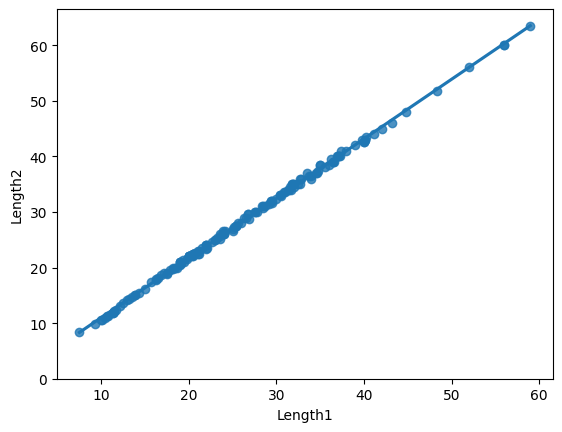

In [132]:
sns.regplot(x="Length1", y="Length2", data=df_fish)
plt.ylim(0,)



###Here This is not correlated with each other because the trend line is too fitted, so thats why we cannot correlate.

(0.0, 24.551499707946117)

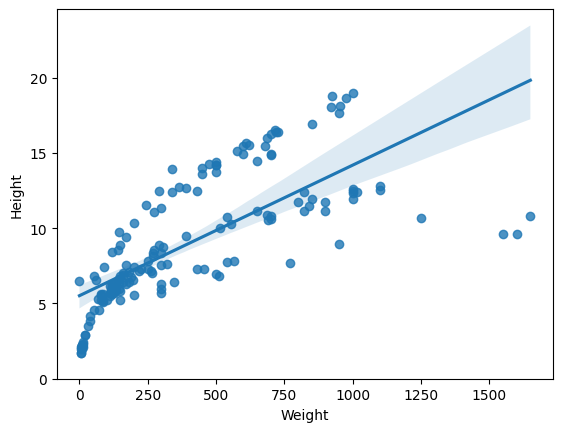

In [133]:
sns.regplot(x="Weight", y="Height", data=df_fish)
plt.ylim(0,)

###Here This is not correlated with each other because the points are scattered here and there

(0.0, 11.085453389847084)

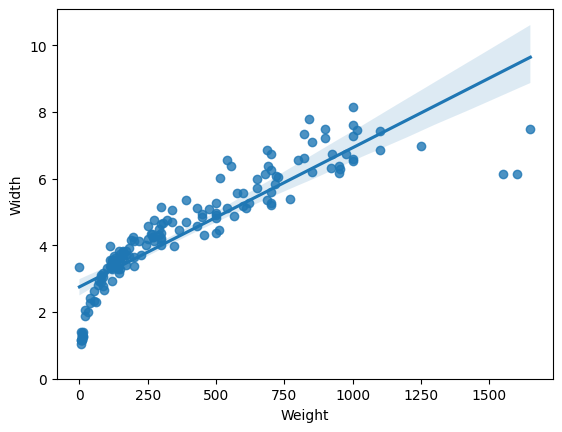

In [134]:
sns.regplot(x="Weight", y="Width", data=df_fish)
plt.ylim(0,)

###Here There is a positive correlation with Height and width. So Height and lenght1 seems good predictor because the line goes perfectly inbetween the points. Since this is significant.

(0.0, 19.827457176226236)

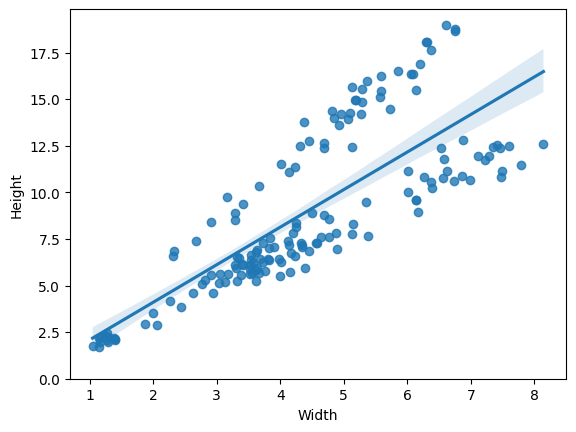

In [135]:
sns.regplot(x="Width", y="Height", data=df_fish)
plt.ylim(0,)

###Here There is a positive correlation with Height and width. So Height and lenght1 seems good predictor because the line goes perfectly inbetween the points. Since this is significant.

(0.0, 70.96)

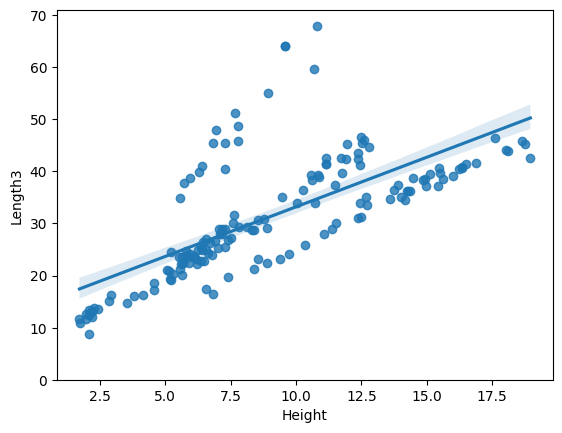

In [136]:
sns.regplot(x="Height", y="Length3", data=df_fish)
plt.ylim(0,)

###Here This is not correlated with each other because the points are scattered here and there

In [137]:
df_fish[["Weight", "Width"]].corr()
## so the score is 0.92

,Weight,Width
Weight,1.000000,0.886507
Width,0.886507,1.000000


In [138]:
df_fish[["Height", "Width"]].corr()
## so the score is 0.80

,Height,Width
Height,1.000000,0.792881
Width,0.792881,1.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Perch'),
  Text(1, 0, 'Bream'),
  Text(2, 0, 'Roach'),
  Text(3, 0, 'Pike'),
  Text(4, 0, 'Smelt'),
  Text(5, 0, 'Parkki'),
  Text(6, 0, 'Whitefish')])

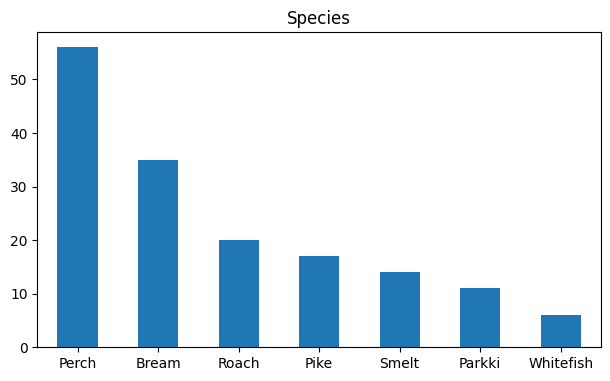

In [139]:
plt.subplot(221)

df_fish['Species'].value_counts().plot(kind='bar', title='Species', figsize=(16,9))

plt.xticks(rotation=0)



<Axes: >

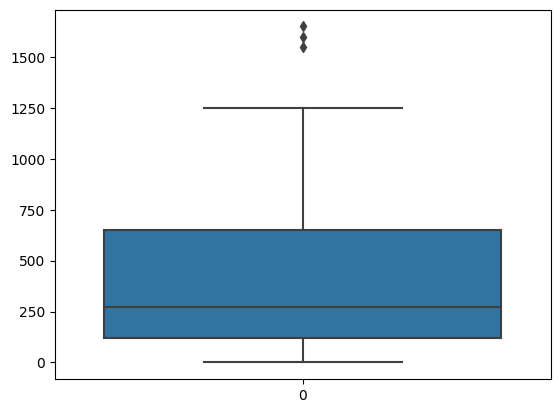

In [140]:
# Box Plot
import seaborn as sns
sns.boxplot(df_fish['Weight'])

In [141]:

# Position of the Outlier
import numpy as np
print(np.where(df_fish['Weight']>1300))

(array([142, 143, 144]),)


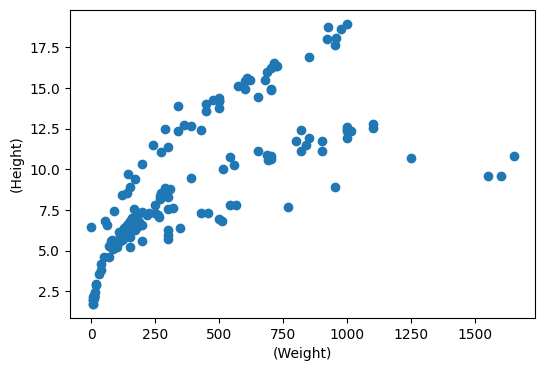

In [142]:

# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df_fish['Weight'],df_fish['Height'])

# x-axis label
ax.set_xlabel('(Weight)')

# y-axis label
ax.set_ylabel('(Height)')
plt.show()

In [143]:
# Position of the Outlier
print(np.where((df_fish['Weight']>1300) & (df_fish['Height']<17.5)))

(array([142, 143, 144]),)


In [144]:

# Z score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_fish['Width']))
print(z)

0      0.236529
1      0.066579
2      0.165793
3      0.022621
4      0.426371
         ...   
154    1.799403
155    1.873547
156    1.881402
157    1.398568
158    1.510440
Name: Width, Length: 159, dtype: float64


In [145]:

threshold = 2

# Position of the outlier
print(np.where(z > 2))

(array([111, 126, 145]),)


In [146]:
# IQR
Q1 = np.percentile(df_fish['Weight'], 25, method='midpoint')
Q3 = np.percentile(df_fish['Weight'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

530.0


In [147]:

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df_fish['Weight']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df_fish['Weight']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())

Upper Bound: 1445.0
3
Lower Bound: -675.0
0


In [149]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_fish['Weight']>=upper)[0]
lower_array = np.where(df_fish['Weight']<=lower)[0]

df_fish.drop(index=upper_array, inplace=True)
df_fish.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_fish.shape)

New Shape:  (156, 7)
